## Introduction: 

This notebook is an implementation for applying PMF on remaining lifetime concept .. for this ex. we have to import PMF.py code (http://greenteapress.com/thinkstats/Pmf.py) that contains functions for calc. PMF and normalizes their values ... 

    Write a function called RemainingLifetime that takes a Pmf of lifetimes and
    an age, and returns a new Pmf that represents the distribution of remaining
    lifetimes.

Before implementing this requirment .. let's introduce the survival analysis .. 

## What is Survival analysis ?!
- Survival analysis attempts to answer questions such as: what is the proportion of a population which will survive past a certain time? Of those that survive, at what rate will they die or fail? Can multiple causes of death or failure be taken into account? How do particular circumstances or characteristics increase or decrease the probability of survival?

- This is why to be able to implement the survival analysis concept .. someone has to have a distribution for the lifetime and an age .. 

As an example we can check ==> https://upload.wikimedia.org/wikipedia/commons/4/47/Excerpt_from_CDC_2003_Table_1.pdf

In [51]:
import Pmf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
all_ages = [30, 20, 25, 40, 35, 25] ## random data
all_ages

[30, 20, 25, 40, 35, 25]

In [53]:
all_ages_prob = Pmf.MakePmfFromList(all_ages)
all_ages_prob

In [54]:
all_ages_prob  ## list of pmfs 

In [55]:
all_ages_prob.d  ## d is a dict, key and value pairs

{20: 0.16666666666666666,
 25: 0.3333333333333333,
 30: 0.16666666666666666,
 35: 0.16666666666666666,
 40: 0.16666666666666666}

So far we converted the unsorted list of values represents different ages to PMFs .. the next step is to normalize the PMFs .. in case they are not !! .. by using Normalize() function from Pmf class .. however, they are already normalized (summed to one) !


## Note: 
MakePmfFromList() calls MakePmfFromHist() by default .. cause PMF and Hist are closely related except hist returns the freq. of each element in the set (int number) but Pmf return probability associated with the occurance of this element in the set (fraction) ..

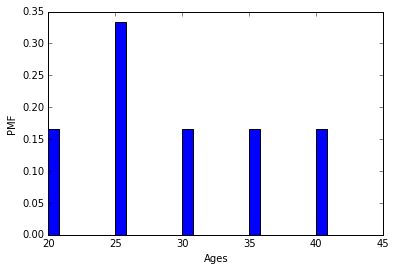

In [56]:
plt.bar(all_ages_prob.d.keys(), all_ages_prob.d.values())  ## as we have discrete values
plt.xlabel('Ages')
plt.ylabel('PMF')

## comment:

The following results might seem correct and understandable .. as follows:

The bar chart demonstrates each age and its corresponding PMF value .. i.e. the pmf of age 25 is twice the pmf of the other ages which is o.33 (as it appears twice in the dataset) .. 

however, this is not 100% corrrect .. 

cuase if we look at the following reference .. 
https://upload.wikimedia.org/wikipedia/commons/4/47/Excerpt_from_CDC_2003_Table_1.pdf

We can find that PMFs have to be drawn using histogrms .. not bar charts .. to be able to allocate whatever input age along the ages axis and figure out its corresponding PMF !! .. however, this is inapplicable in our case as we deal with discrete values not continuous 

In [76]:
def remaininglifetime(pmf, age):
    index = all_ages_prob.d.keys()
    vals = all_ages_prob.d.values()
    
    k = []
    v = []
    
    for i in xrange(len(index)):
        if(index[i]  > age):
            k.append(index[i])
            v.append(vals[i])
            
    return k, v

In [77]:
age = 20
k, v = remaininglifetime(all_ages_prob.d, age)
k, v

([40, 25, 35, 30],
 [0.16666666666666666,
  0.3333333333333333,
  0.16666666666666666,
  0.16666666666666666])

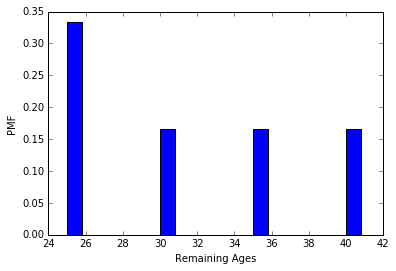

In [78]:
plt.bar(k, v)
plt.xlabel('Remaining Ages')
plt.ylabel('PMF')

The output of the above function represents the remaining lifetime after the input age. 